### The First Equation

The original equation is:

$$
\dot{\Delta b} = -B - \left| q_0 + q_1 (\Delta b - b_0) \right| (\Delta b - b_0)
$$

Given that you want to plot the relationship between \( \Delta b \) and \( B \), we can rearrange this equation to express \( B \) in terms of \( \Delta b \) when \( \dot{\Delta b} = 0 \).

#### Setting \( \dot{\Delta b} = 0 \):

$$
0 = -B - \left| q_0 + q_1 (\Delta b - b_0) \right| (\Delta b - b_0)
$$

#### Rearranged:

$$
B = - \left| q_0 + q_1 (\Delta b - b_0) \right| (\Delta b - b_0)
$$

This equation defines \( B \) as a function of \( \Delta b \). We can plot this function to visualize the relationship.

---

### Using Specific Parameter Values

Let's use the parameter values previously specified:

- \( q_0 = 0.5 \)
- \( q_1 = 1.0 \)
- \( b_0 = 0 \)

Substituting these values:

$$
B = - \left| 0.5 + \Delta b \right| \Delta b
$$

This is the equation we need to plot.

---

### Plotting the Relationship

We will plot \( B \) as a function of \( \Delta b \) over a suitable range, say \( \Delta b \in [-10, 10] \).

---

Now you can copy this Markdown content into VS Code, and the equations should display correctly when you preview the Markdown file.

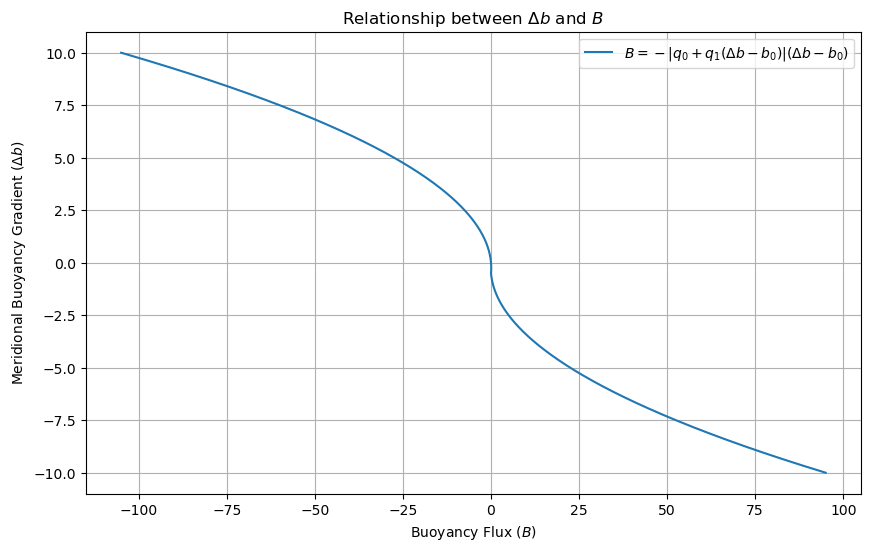

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
q0 = 0.5
q1 = 1.0
b0 = 0

# Define the function for B in terms of delta_b
def B_vs_delta_b(delta_b):
    return -np.abs(q0 + q1 * (delta_b - b0)) * (delta_b - b0)

# Create a range of delta_b values
delta_b_values = np.linspace(-10, 10, 1000)

# Compute B for each delta_b
B_values = B_vs_delta_b(delta_b_values)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(B_values, delta_b_values, label=r'$B = -|q_0 + q_1 (\Delta b - b_0)| (\Delta b - b_0)$')
plt.title('Relationship between $\Delta b$ and $B$')
plt.ylabel('Meridional Buoyancy Gradient ($\Delta b$)')
plt.xlabel('Buoyancy Flux ($B$)')
plt.grid(True)
plt.legend()
plt.show()


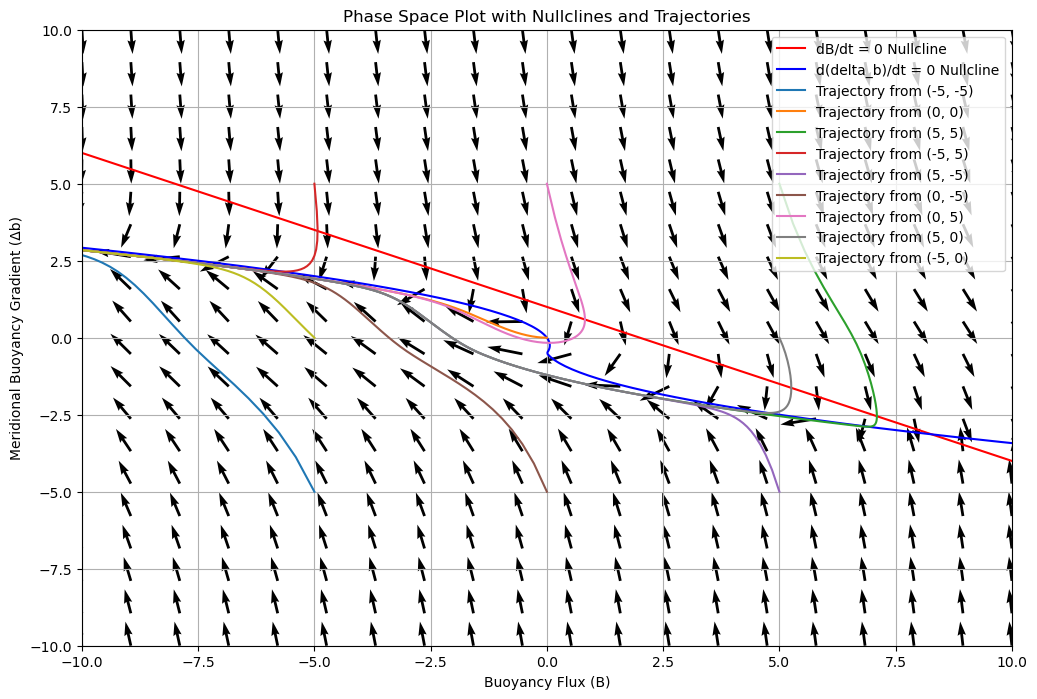

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameter values
q0 = 0.5
q1 = 1.0
b0 = 0
tau = 1
alpha = 0.5
gamma = 1

# Define the ODE system
def system(t, y):
    B, delta_b = y
    abs_term = np.abs(q0 + q1 * (delta_b - b0))
    delta_b_dot = -B - abs_term * (delta_b - b0)
    B_dot = (delta_b + alpha * B - gamma) / tau
    return [B_dot, delta_b_dot]

# Create a grid for the vector field
B_values = np.linspace(-10, 10, 20)
delta_b_values = np.linspace(-10, 10, 20)
B_grid, delta_b_grid = np.meshgrid(B_values, delta_b_values)

# Compute derivatives on the grid
abs_term_grid = np.abs(q0 + q1 * (delta_b_grid - b0))
delta_b_dot_grid = -B_grid - abs_term_grid * (delta_b_grid - b0)
B_dot_grid = (delta_b_grid + alpha * B_grid - gamma) / tau

# Normalize the vectors
magnitude = np.hypot(B_dot_grid, delta_b_dot_grid)
B_dot_norm = B_dot_grid / magnitude
delta_b_dot_norm = delta_b_dot_grid / magnitude

# Plot the vector field
plt.figure(figsize=(12, 8))
plt.quiver(B_grid, delta_b_grid, B_dot_norm, delta_b_dot_norm, angles='xy', scale_units='xy')

# Plot nullclines
# Nullcline for dB/dt = 0: delta_b = -0.5 * B + 1
B_nullcline = np.linspace(-10, 10, 400)
delta_b_nullcline_B = -0.5 * B_nullcline + 1
plt.plot(B_nullcline, delta_b_nullcline_B, 'r-', label='dB/dt = 0 Nullcline')

# Nullcline for d(delta_b)/dt = 0: B = -|0.5 + delta_b| * delta_b
delta_b_nullcline = np.linspace(-10, 10, 400)
B_nullcline_delta_b = -np.abs(0.5 + delta_b_nullcline) * delta_b_nullcline
plt.plot(B_nullcline_delta_b, delta_b_nullcline, 'b-', label='d(delta_b)/dt = 0 Nullcline')

# Plot trajectories from different initial conditions
initial_conditions = [
    (-5, -5),
    (0, 0),
    (5, 5),
    (-5, 5),
    (5, -5),
    (0, -5),
    (0, 5),
    (5, 0),
    (-5, 0)
]

t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

for B0, delta_b0 in initial_conditions:
    sol = solve_ivp(system, t_span, [B0, delta_b0], t_eval=t_eval, max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory from ({B0}, {delta_b0})')

# Labels and legend
plt.title('Phase Space Plot with Nullclines and Trajectories')
plt.xlabel('Buoyancy Flux (B)')
plt.ylabel('Meridional Buoyancy Gradient (Δb)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


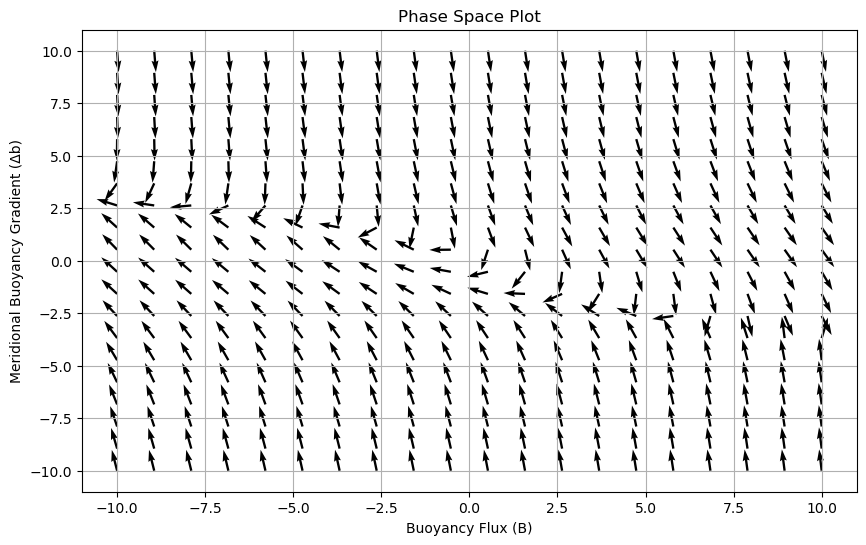

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
q0 = 0.5
q1 = 1.0
b0 = 0
tau = 1
alpha = 0.5
gamma = 1

# Define the functions
def delta_b_dot(B, delta_b):
    abs_term = np.abs(q0 + q1 * (delta_b - b0))
    return -B - abs_term * (delta_b - b0)

def B_dot(B, delta_b):
    return (delta_b + alpha * B - gamma) / tau

# Create a grid of points
B_values = np.linspace(-10, 10, 20)
delta_b_values = np.linspace(-10, 10, 20)
B_grid, delta_b_grid = np.meshgrid(B_values, delta_b_values)

# Compute the derivatives
delta_b_dot_values = delta_b_dot(B_grid, delta_b_grid)
B_dot_values = B_dot(B_grid, delta_b_grid)

# Normalize the vectors for better visualization
magnitude = np.hypot(delta_b_dot_values, B_dot_values)
delta_b_dot_values_norm = delta_b_dot_values / magnitude
B_dot_values_norm = B_dot_values / magnitude

# Plot the vector field
plt.figure(figsize=(10, 6))
plt.quiver(B_grid, delta_b_grid, B_dot_values_norm, delta_b_dot_values_norm, angles='xy')

plt.title('Phase Space Plot')
plt.xlabel('Buoyancy Flux (B)')
plt.ylabel('Meridional Buoyancy Gradient (Δb)')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25668\1933430454.py:22: RuntimeWarning: overflow encountered in double_scalars
  b[i] = b[i-1] + dt * (-B[i-1] - abs(q) * db + noise_b)
C:\Users\User\AppData\Local\Temp\ipykernel_25668\1933430454.py:22: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = b[i-1] + dt * (-B[i-1] - abs(q) * db + noise_b)


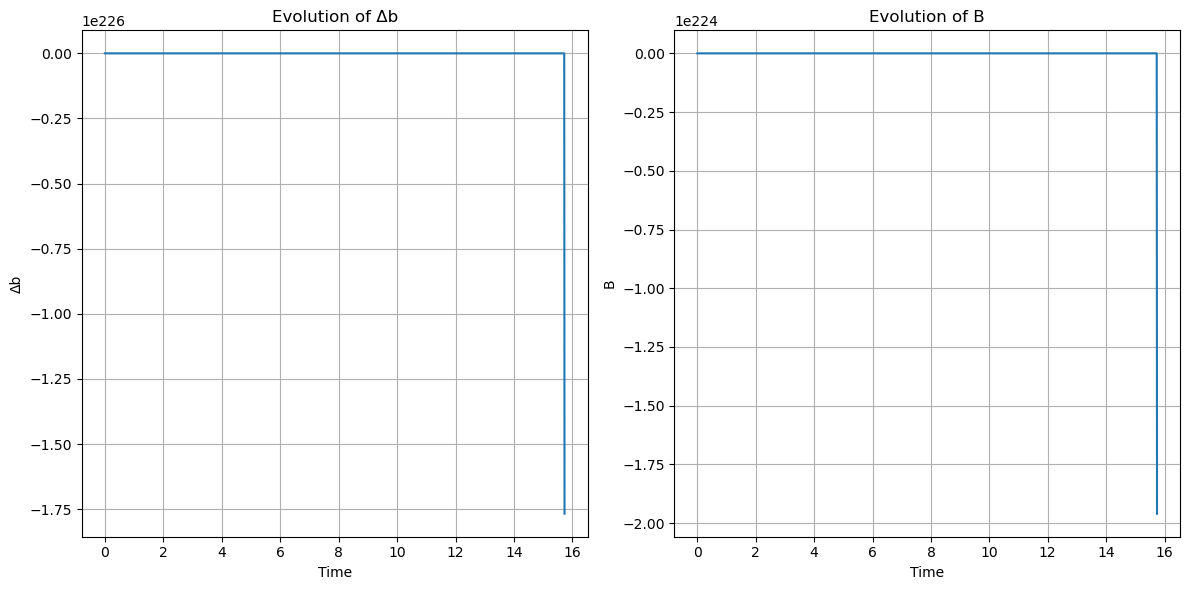

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b0, q0, q1, tau, alpha, gamma, sigma = 0.625, -9., 12., 0.902, 0.5, 1.2, 0.1
dt = 0.01  # Time step
T = 100  # Total time
N = int(T / dt)  # Number of steps

# Initialize arrays
b = np.zeros(N)
B = np.zeros(N)
b[0], B[0] = 1.0, 0.0  # Initial conditions

# Simulate the model
for i in range(1, N):
    db = b[i-1] - b0
    q = q0 + q1 * db
    noise_b = sigma * np.random.normal()
    noise_B = sigma * np.random.normal()

    b[i] = b[i-1] + dt * (-B[i-1] - abs(q) * db + noise_b)
    B[i] = B[i-1] + dt * (1/tau) * (b[i-1] + alpha * B[i-1] - gamma + noise_B)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, b, label='Meridional Buoyancy Gradient (Δb)')
plt.xlabel('Time')
plt.ylabel('Δb')
plt.title('Evolution of Δb')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(N) * dt, B, label='Buoyancy Flux (B)')
plt.xlabel('Time')
plt.ylabel('B')
plt.title('Evolution of B')
plt.grid(True)

plt.tight_layout()
plt.show()


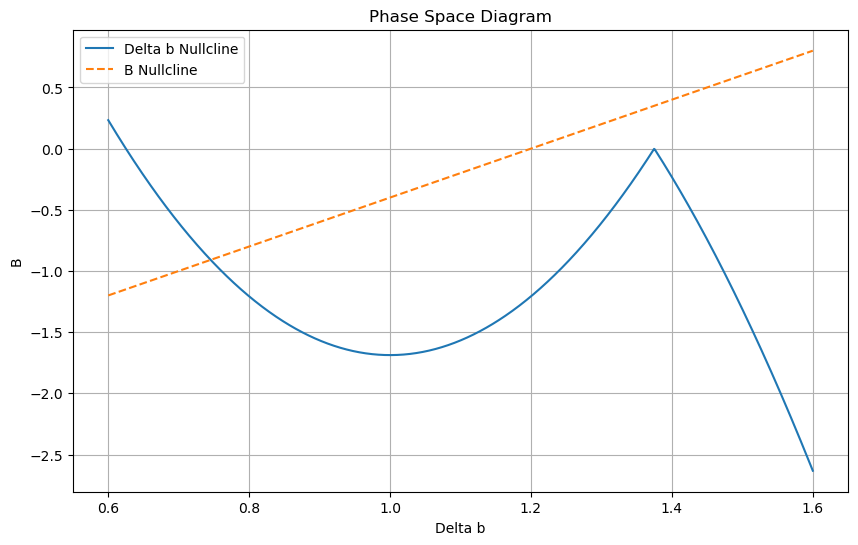

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
b0, q0, q1, tau, alpha, gamma = 0.625, -9., 12., 0.902, 0.5, 1.2
N = 1000
b_range = np.linspace(0.6, 1.6, N)

# Delta b nullcline calculation
B_null = -abs(q0 + q1 * (b_range - b0)) * (b_range - b0)

# B nullcline calculation
B = (b_range - gamma) / alpha

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(b_range, B_null, label='Delta b Nullcline')
plt.plot(b_range, B, label='B Nullcline', linestyle='--')
plt.xlabel('Delta b')
plt.ylabel('B')
plt.title('Phase Space Diagram')
plt.legend()
plt.grid(True)
plt.show()
